#  Binome : HAMAT - GLASS


# Réduction de dimensions et Visualisation des données : crimes aux US


In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('./crimes.csv', sep=';')
data.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [3]:
X = data.iloc[:, 1:].values
labels = data.iloc[:, 0].values

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
SC = StandardScaler()
SC.fit(X)
Xnorm = SC.transform(X)


pca=PCA(n_components = 7)

pca.fit(Xnorm)
axe1 = pca.components_[0,:]
axe2 = pca.components_[1,:]

print("explained_variance_", pca.explained_variance_)

explained_variance_ [4.19893828 1.26400187 0.74062921 0.32288984 0.26323924 0.22657089
 0.12658781]


In [6]:
# On demande un ratio de 90% de l'information
requestedRatio = 0.9
sumRatio = 0
nbVar = 0
print("explained_variance_ratio_", pca.explained_variance_ratio_)
for nextRatio in pca.explained_variance_ratio_ :
    sumRatio = sumRatio + nextRatio
    print(nextRatio, sumRatio )
    nbVar = nbVar+1
    if(sumRatio>=requestedRatio): 
        print("ok",sumRatio )
        break
        
# Ici on prend les 4 premières variables pour avoir 90% de l'information
print("nbVar", nbVar)

explained_variance_ratio_ [0.58785136 0.17696026 0.10368809 0.04520458 0.03685349 0.03171992
 0.01772229]
0.5878513585500843 0.5878513585500843
0.17696026164078002 0.7648116201908643
0.10368808947280954 0.8684997096636738
0.04520457795663013 0.913704287620304
ok 0.913704287620304
nbVar 4


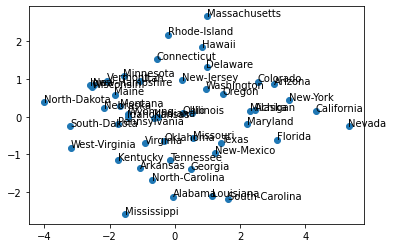

In [7]:
X_pca = pca.transform(Xnorm)

plt.scatter(X_pca[:,0], X_pca[:,1])
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')


# Interprétations

In [8]:
seuil = 1/np.sqrt(7)
print('seuil = ' , seuil)

seuil =  0.3779644730092272


In [9]:
print("premier axe :")
print(axe1)
print("deuxième axe :")
print(axe2)

premier axe :
[0.30027916 0.43175936 0.39687549 0.3966517  0.44015721 0.35735953
 0.29517681]
deuxième axe :
[-0.62917444 -0.16943512  0.04224698 -0.34352815  0.20334059  0.40231912
  0.50242093]


       - _____________axe1_______________+ Meutre, Rapt, Vol, Attaque, Viol, Larcin, Auto_Theft

     Meutre, Attaque - _____________axe1_______________+ Larcin, Auto_Theft

Le premier axe apporte 58% de l'information. 
Le 2 ème axe conserve 18 % de la variance du nuage
On ne peut pas faire confiance à la répresentation ci-dessus car les 2 premiers axes qui n'apportent que 76 % de l'information.

L'axe 1 répresente le délit moyenne par état tandisque l'axe 2 répresente une différence entre les délits graves et les moins graves.

Les Etats à droite de l'axe 1 ont un délit moyen fort et ceux à gauche ont un délit moyen faible.

Enfin pour l'axe 2,les Etats à gauche sont ceux qui ont des forts délits graves et inversement ceux de droite ont des forts
délits faibles.